# Sprint 1: Data Preparation & exploration

Author: Mina Roohnavazfar
Date: July 28, 2023

### Introduction
In this Jupyter Notebook, we will be exploring and performing Exploratory Data Analysis (EDA) on a comprehensive dataset containing the hourly count of rental bikes in the Capital Bikeshare system for the years 2011 and 2012 in Washington D.C., USA. This dataset also includes crucial weather and seasonal information, as these factors play a significant role in bike-sharing rental behaviors.

Bike-sharing rental systems have gained immense popularity due to their convenience and accessibility. With the entire process, from membership to rental and return, being automated, users can effortlessly rent bikes from one location and return them at another. Currently, there are more than 500 bike-sharing programs worldwide, featuring over 500,000 bicycles. These systems have become crucial players in addressing traffic, environmental, and health concerns.

The dataset used in this analysis comprises a two-year historical log from the Capital Bikeshare system. It provides an opportunity to investigate the influence of various factors, such as weather conditions, precipitation, day of the week, season, and hour of the day, on bike rental patterns.

Weather information for the dataset is sourced from http://www.freemeteo.com, ensuring that relevant environmental conditions are taken into account during the analysis.

Throughout this exploration and EDA, we aim to uncover valuable insights from the data, identify patterns, correlations, and interesting trends. By examining this bike-sharing dataset, we can gain a deeper understanding of the system's impact on traffic, the environment, and public health. Additionally, we hope to leverage this data to contribute to ongoing research in the field and further the understanding of urban mobility and transportation systems.


### Data Dictionary

Our dataset (hour.csv) includes the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain 
             + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

>NOTE: In this dataset, the independent variables consist of columns ranging from 'dteday' to 'windspeed'. Additionally, we have three target variables: 'cnt', 'casual', and 'registered'. The 'cnt' variable is calculated as the total sum of bike rentals for both 'casual' and 'registered' users. 
We have two distinct approaches for modeling this dataset. The first approach involves considering 'cnt' as the target variable and predicting its value based on the other independent variables. In this case, we treat 'cnt' as the comprehensive outcome we want to predict.
Alternatively, the second approach entails creating two separate models associated with 'casual' and 'registered' users. After generating these two predictions, we then compute 'cnt' by summing up the individual predictions from the two models. This method allows us to analyze the dataset in a more detailed manner by understanding the contributions of 'casual' and 'registered' users to the overall 'cnt' variable. 
	

### Table of contents
* Part 1 - Data Exploration
* Part 2 - EDA
* Part 3 - Statistical Analysis

### Part 1: Data Exploration

In [6]:
# importing required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.style.use('ggplot') # applying the 'ggplot' style to the plots

In [7]:
# read data from the CSV file:
df=pd.read_csv('C:/Users/HP/Desktop/brainstation/projects/Capstone/Sprint 0/Bike sharing/hour.csv')

In [8]:
# sanity checks with the columns and the first 5 rows:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
# remove the column 'instant' as it is just an index of cases.
df = df.drop(['instant'], axis=1)

In [10]:
# sanity checks with the first 5 rows after dropping column 'instant':
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
# sanity checks with the last 5 rows:
df.tail()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [12]:
# sanity checks with a sample of 10 rows:
df.sample(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8443,2011-12-23,1,0,12,11,0,5,1,1,0.40,0.4091,0.58,0.4478,26,148,174
13610,2012-07-26,3,1,7,7,0,4,1,1,0.70,0.6667,0.74,0.2537,17,478,495
12600,2012-06-14,2,1,6,5,0,4,1,2,0.60,0.6212,0.56,0.2537,0,40,40
10756,2012-03-29,2,1,3,7,0,4,1,1,0.46,0.4545,0.51,0.3582,14,353,367
16581,2012-11-28,4,1,11,15,0,3,1,1,0.36,0.3333,0.32,0.3284,7,172,179
16273,2012-11-15,4,1,11,19,0,4,1,2,0.34,0.3333,0.61,0.1343,11,375,386
7186,2011-11-01,4,0,11,1,0,2,1,1,0.36,0.3485,0.81,0.1343,3,8,11
8150,2011-12-11,4,0,12,6,0,0,0,1,0.16,0.2273,0.59,0.0000,0,10,10
5612,2011-08-26,3,0,8,18,0,5,1,2,0.74,0.7121,0.74,0.1343,40,370,410
6386,2011-09-28,4,0,9,16,0,3,1,1,0.70,0.6515,0.70,0.1940,39,241,280


In [13]:
# display dimensions of data:
df.shape
print(f'data includes {df.shape[0]} rows and {df.shape[1]} columns.')

data includes 17379 rows and 16 columns.


In [14]:
# summary of mydata:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


Finding:
- All the columns have 17379.
- df contains fiftheen numerical columns. All of these columns are integer except for temp, atemp, hum, and windspeed which are Float.
- df contains only one categorical column as dteday. 

In [15]:
# convert 'dteday' column to a pandas DateTime type:
df['dteday']= pd.to_datetime(df['dteday'])
print(df['dteday'].dtype)
df['dteday']

datetime64[ns]


0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, Length: 17379, dtype: datetime64[ns]

In [16]:
# check the number of missing values for columns:
df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing values.

In [17]:
# check the exact duplicates rows:
df.duplicated().sum()

0

There are no duplicate rows.

In [18]:
# check for duplicated columns by transpose
df.T.duplicated() # There is no duplictaed columns in mydata.

dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

There are not exact duplicate columns.

In [19]:
# we can check for mathmatically duplicated columns by correlation
# but we need to look at only numerical data
df_num = df.select_dtypes(include="number")
df_num.corr()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.319380,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929


<Axes: >

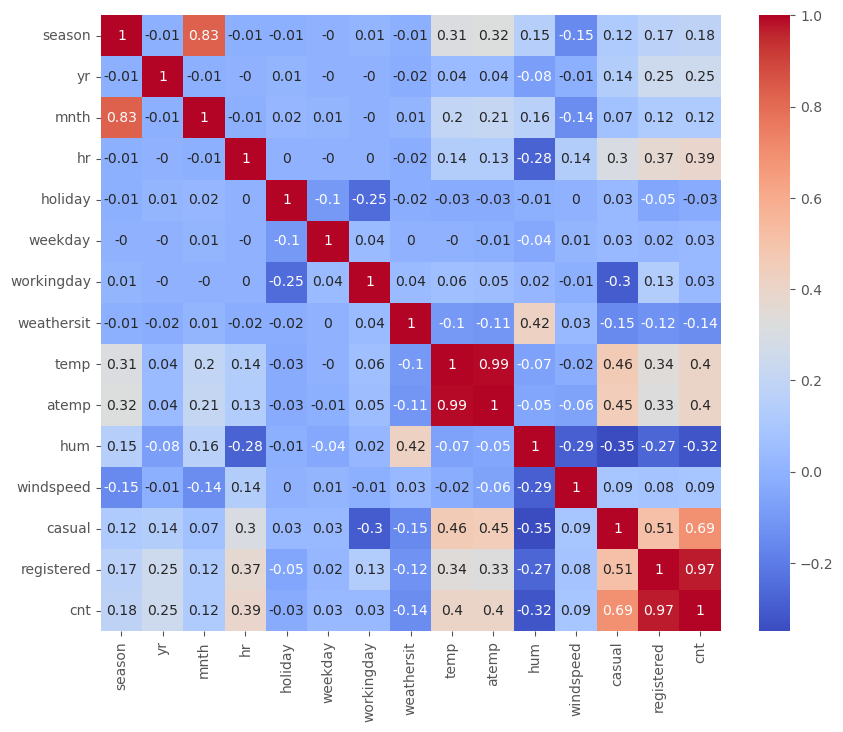

In [20]:
# display the heatmap for correlation matrix:
plt.figure(figsize=(10, 8))
sns.heatmap(round(df_num.corr(),2),cmap='coolwarm',annot=True)

Finding:
- The columns 'month' and 'season' exhibit a strong positive correlation of approximately 0.83.
- As expected, the columns 'registered', 'cnt', and 'casual' show a high positive correlation with each other. This is because the "cnt" values represent the total count of 'casual' and 'registered' rentals.
- 'temp' and 'atemp' are highly correlated because they are both derived from the same underlying weather conditions.

### Part 2: EDA
Here we are going to examine and visualize the dataset to gain insights, identify patterns, and understand the structure and characteristics of the data.

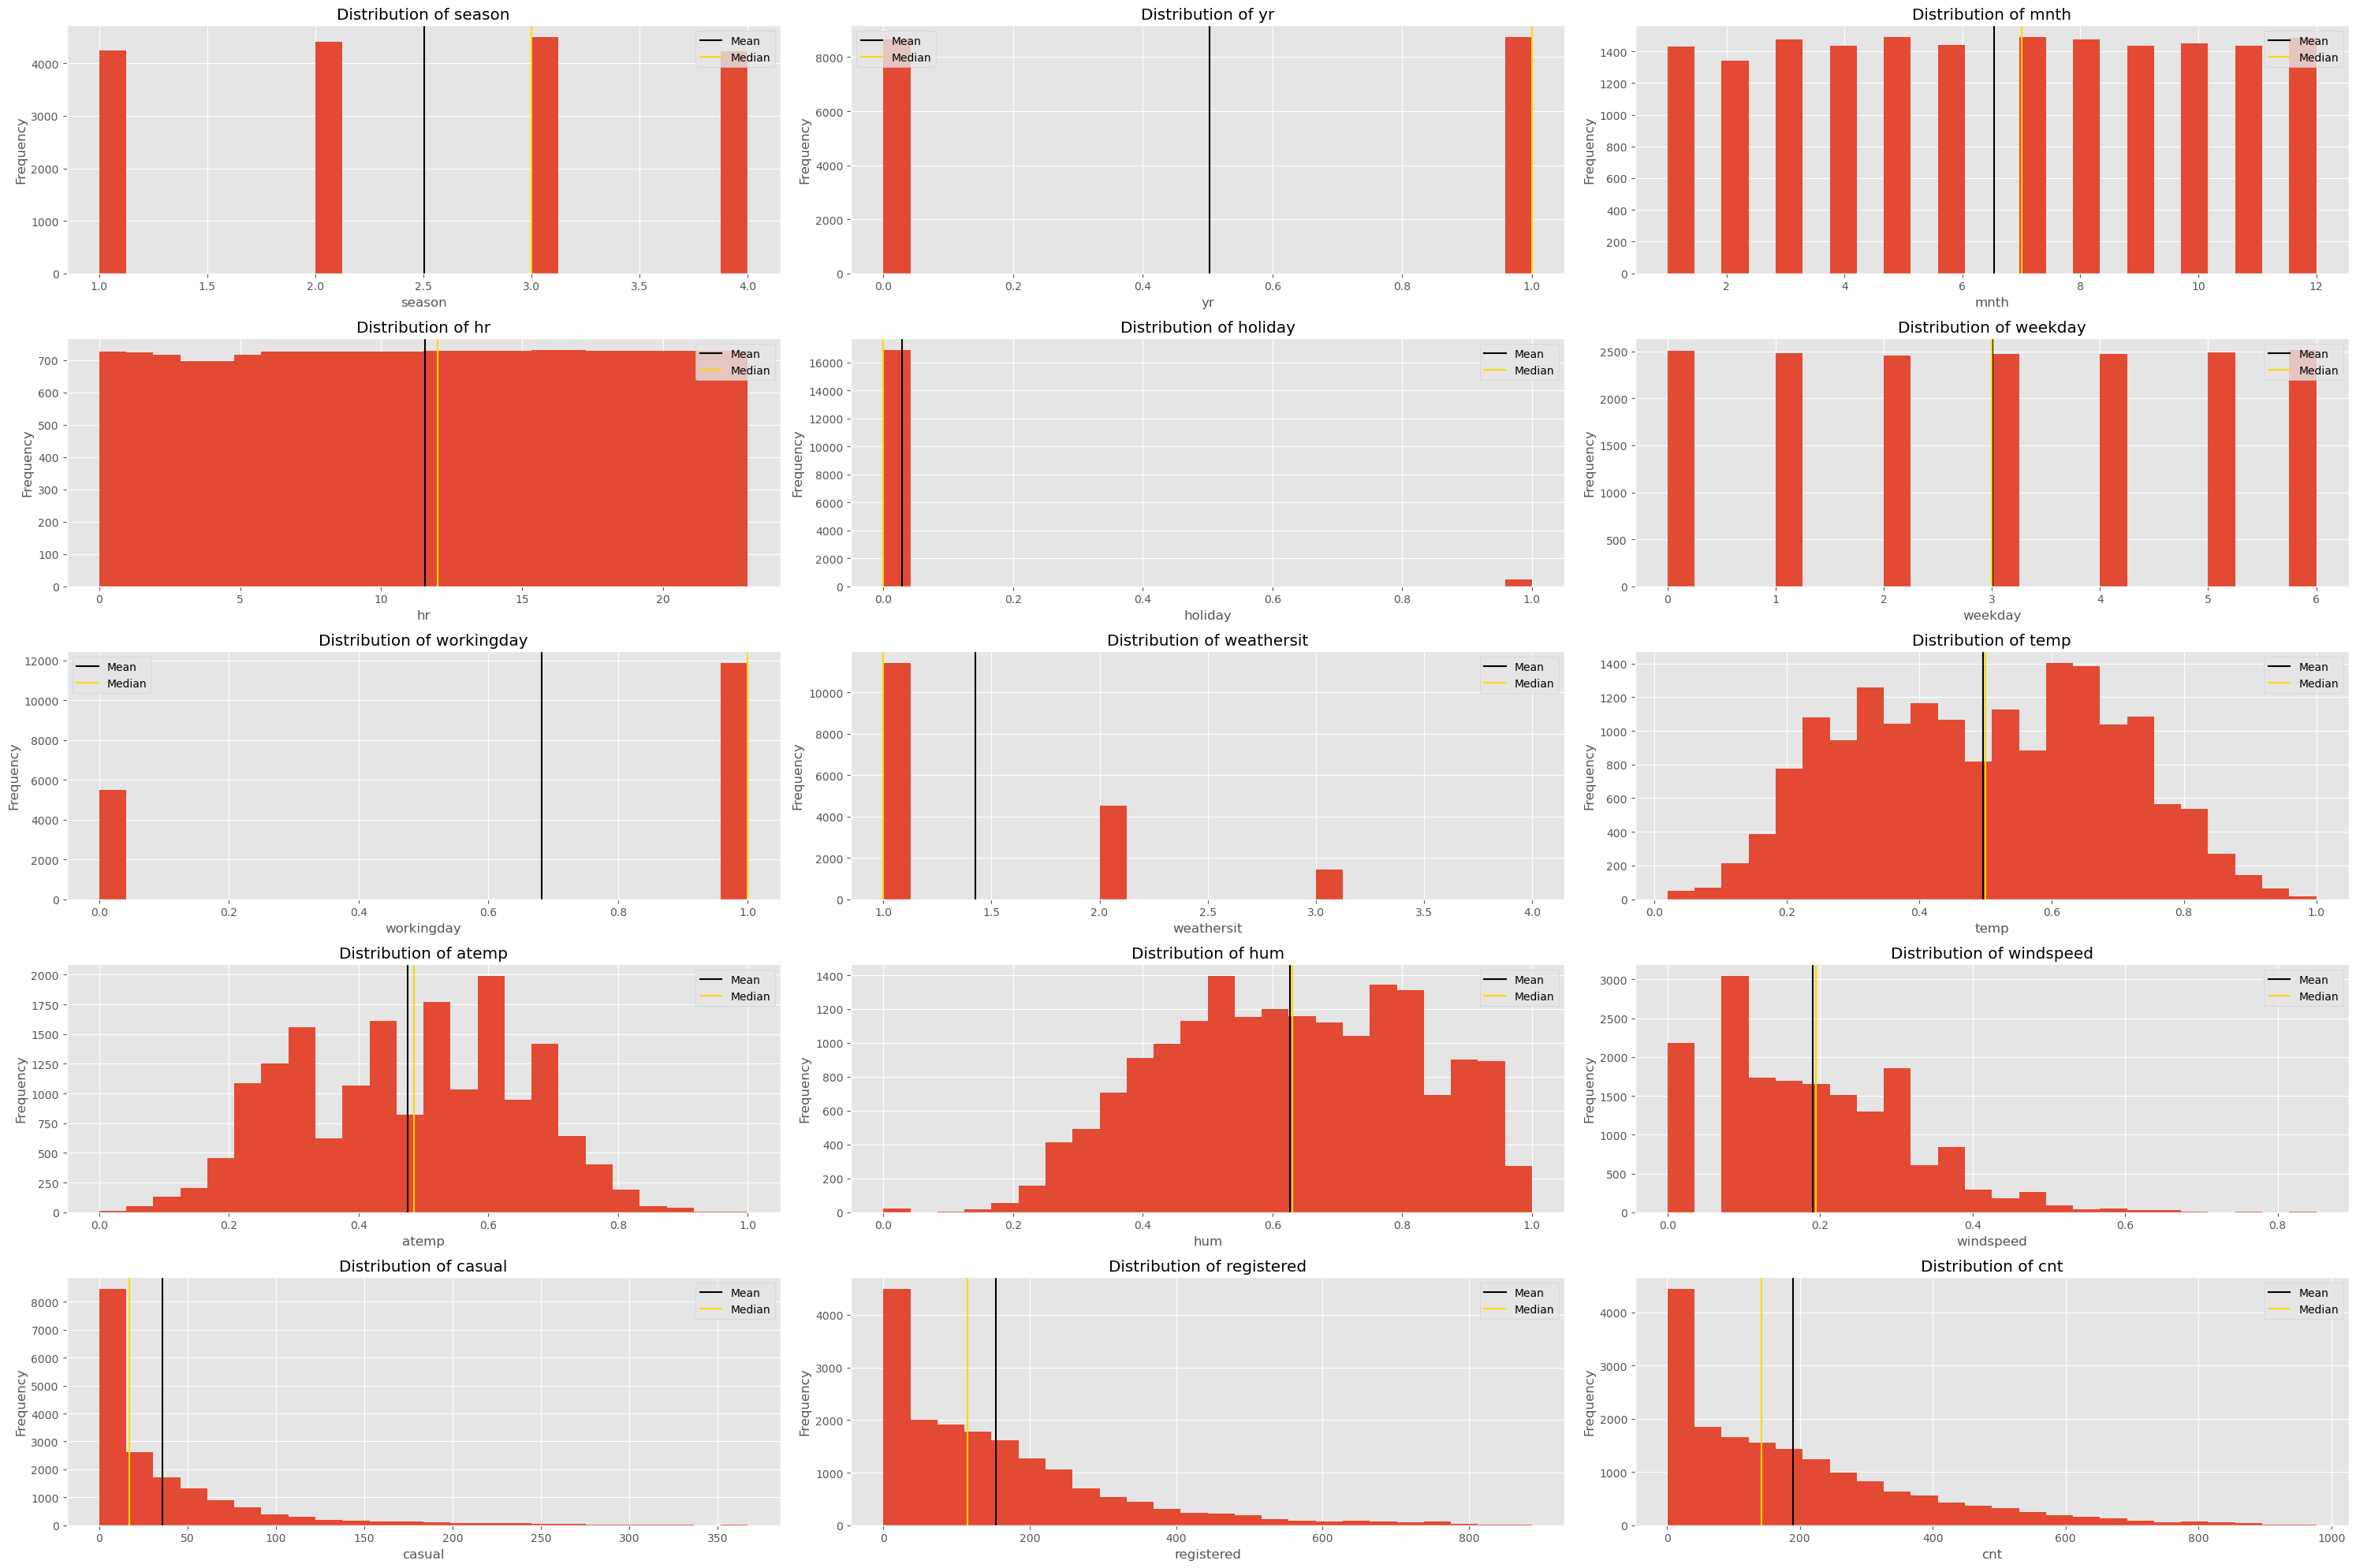

In [21]:
# We will be making 2 rows x 4 columns of subplots
plt.subplots(5,3, figsize=(30,20))

# Creating the for loop
for slot_num, column in enumerate(df_num.columns, start=1):
    
    # Creating a hist for every iteration
    plt.subplot(5,3,slot_num)
    plt.hist(df[column], bins=24)
    
    # Set the titles and labels
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Adding median and mean lines
    plt.axvline(df[column].mean(), c='black', label='Mean')
    plt.axvline(df[column].median(), c='gold', label='Median')
    plt.legend()
    
plt.tight_layout()

plt.show()    

Finding:
- The distribution of the 'season' variable indicates that each of the four seasons has more than 4000 records.
- The data covers a span of two years with more thn 8000 records for each year.
- The distribution of the 'month' variable shows the number of records for each month. The majority of months have more than 1400 cases, except for month 2, which has a value lower than this threshold.
- The 'hr' variable's distribution shows that there are approximately 700 records for most hours.
- The holiday distribution plot indicates that the number of records corresponding to holidays is significantly lower than the number of records for non-holiday days.
- The distribution of the 'weekday' variable suggests that each of the seven weekdays has a relatively similar number of records, with approximately less than 2500 observations each. 
- From the distribution of the 'workingday' column, it is evident that the number of records for working days is significantly higher compared to the number of records for non-working days.
- Weather situation 1 has the highest number of records, followed by weather situation 2, and then weather situation 3.
- The variables 'temp' and 'atemp' exhibit approximately normal distributions.
- The variable 'hum' is slightly left-skewed.
- The variable 'windspeed' displays a right-skewed distribution.
- The Target variables 'casual', 'registered', and 'cnt' demonstrate a notably strong right-skewed distribution. This columns may have zero values. To address this skewness, there are a number of ways such as adding value 1 to variables, root square, cube root square,... . we apply a square root transformation to target variables as they lead to better result, in this project.

In [22]:
# Dealing with skewness by square root transformation for the three target variables 'casual', 'registered', and 'cnt':
df['t_casual'] =  np.sqrt(df['casual'])
df['t_registered'] =  np.sqrt(df['registered'])
df['t_cnt'] =  np.sqrt(df['cnt'])

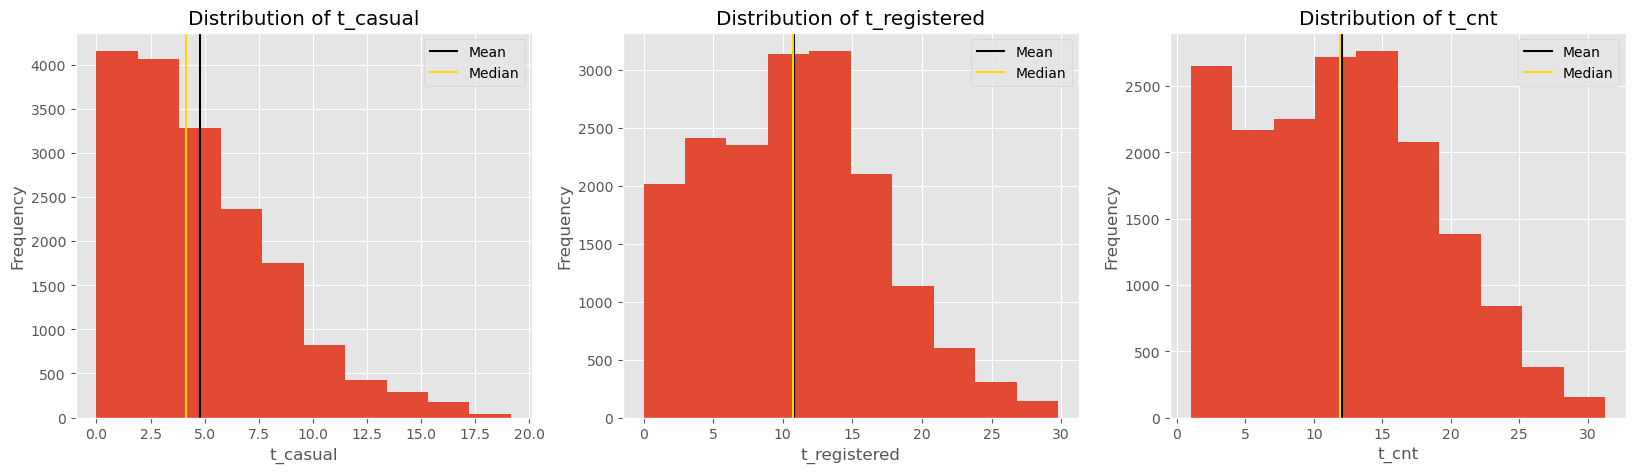

In [23]:
# We will be making 1 rows x 3 columns of subplots for the three transformed target variables
t_uers=['t_casual','t_registered','t_cnt']
plt.subplots(1, 3, figsize=(20, 5))
i=1
for column in t_uers:
    plt.subplot(1, 3, i)
    plt.hist(df[column])
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    plt.axvline(df[column].mean(), c='black', label='Mean')
    plt.axvline(df[column].median(), c='gold', label='Median')
    plt.legend()
    
    i += 1
plt.show()   

Finding:
- The transformed target variables 't_casual', 't_registered', and 't_cnt' demonstrate reduced skewness compared to their original distributions.

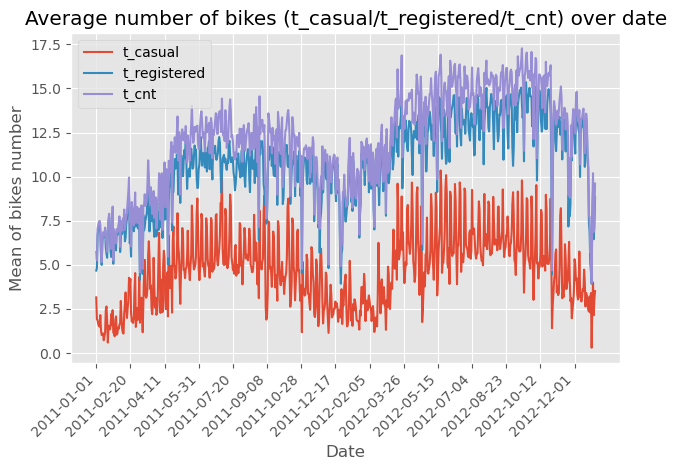

In [24]:
# Average number of transformed rentals (t_casual/t_registered/t_cnt) over date:
dteday_casual = df.groupby('dteday')['t_casual'].mean()  # average of t_casual over date
dteday_registered = df.groupby('dteday')['t_registered'].mean()  # average of t_registered over date
dteday_cnt = df.groupby('dteday')['t_cnt'].mean()  # average of t_cnt over date

# Create a list of dates for the x-axis ticks
dates = df['dteday'].unique()

plt.figure()
plt.plot(dates, dteday_casual, label='t_casual')
plt.plot(dates, dteday_registered, label='t_registered')
plt.plot(dates, dteday_cnt, label='t_cnt')

plt.xlabel("Date")
plt.ylabel("Mean of bikes number")
plt.title("Average number of bikes (t_casual/t_registered/t_cnt) over date")

# Set x-axis ticks at every 50th data point
plt.xticks(dates[::50], rotation=45, ha='right') 

plt.legend()
plt.tight_layout()
plt.show()

Finding:
- Over the two years (2011-2012), it is evident that the average number of bikes rented by casual users is lower than that of registered users. As expected, the average value for 'cnt' (total count) is higher than both 'casual' and 'registered', given that 'cnt' represents the sum of 'casual' and 'registered' bike rentals.
- The analysis indicates a noticeable increase in the number of registered bike rentals from the year 2011 to 2012. However, the increase in casual rentals over the same period is relatively small.

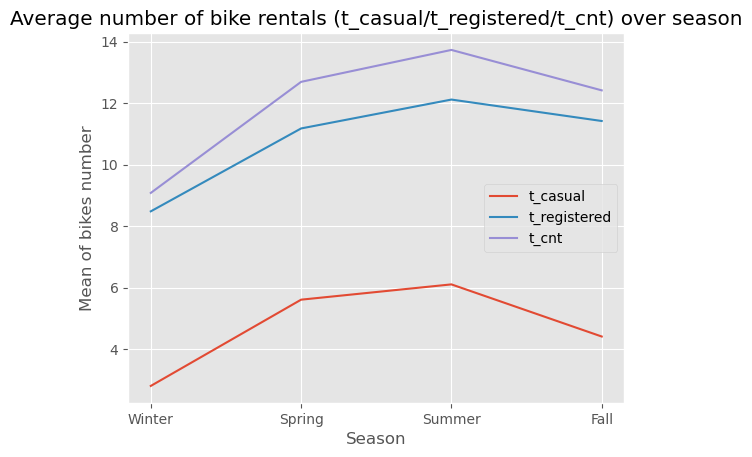

In [25]:
# Average number of transformed rentals (t_casual/t_registered/t_cnt) over season:
season_casual = df.groupby('season')['t_casual'].mean()  # average of t_casual over season
season_registered = df.groupby('season')['t_registered'].mean()  # average of t_registered over season
season_cnt = df.groupby('season')['t_cnt'].mean()  # average of t_cnt over season

# Set the x-axis ticks and labels
seasons = ['Winter','Spring', 'Summer', 'Fall'] 
season_labels = [1, 2, 3, 4]

plt.figure()
plt.plot(season_labels, season_casual, label='t_casual')
plt.plot(season_labels, season_registered, label='t_registered')
plt.plot(season_labels, season_cnt, label='t_cnt')

plt.xticks(season_labels, seasons)  # Set the x-axis ticks to the season numbers
plt.xlabel("Season")
plt.ylabel("Mean of bikes number")
plt.title("Average number of bike rentals (t_casual/t_registered/t_cnt) over season")
plt.legend()
plt.show()

Finding:
- For both casual and registered users, the average number of bike rentals is higher during the spring and summer seasons compared to the winter and fall seasons.
- On average, the 'cnt' variable exhibits the highest average number of rental bikes, followed by registered users and then casual users.

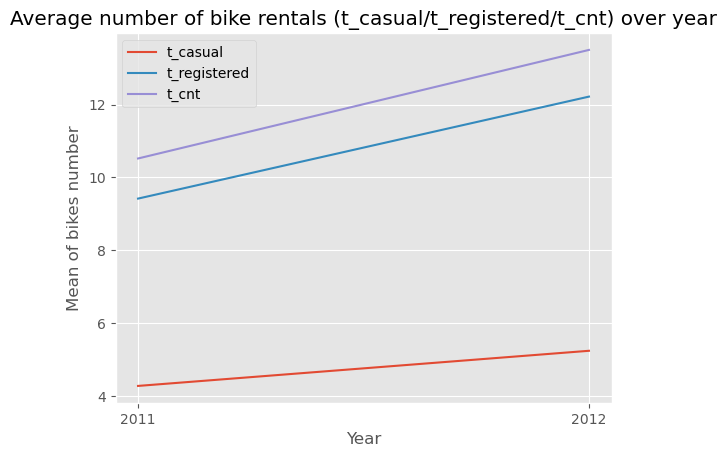

In [26]:
# Average number of transformed rentals (t_casual/t_registered/t_cnt) over year:
yr_casual = df.groupby('yr')['t_casual'].mean()  # average of t_casual over year
yr_registered = df.groupby('yr')['t_registered'].mean()  # average of t_registered over year
yr_cnt = df.groupby('yr')['t_cnt'].mean()  # average of t_cnt over year

# Set the x-axis ticks and labels
year = ['2011', '2012']

plt.figure()
plt.plot(year, yr_casual, label='t_casual')
plt.plot(year, yr_registered, label='t_registered')
plt.plot(year, yr_cnt, label='t_cnt')

plt.xlabel("Year")
plt.ylabel("Mean of bikes number")
plt.title("Average number of bike rentals (t_casual/t_registered/t_cnt) over year")
plt.legend()
plt.show()

Finding:
- For both casual and registered users, the average number of bike rentals increased in the year 2012 compared to the year 2011. - The slope of this increasing trend is larger for registered users than for casual users, indicating a more substantial increase in bike rentals for registered users over the two years.

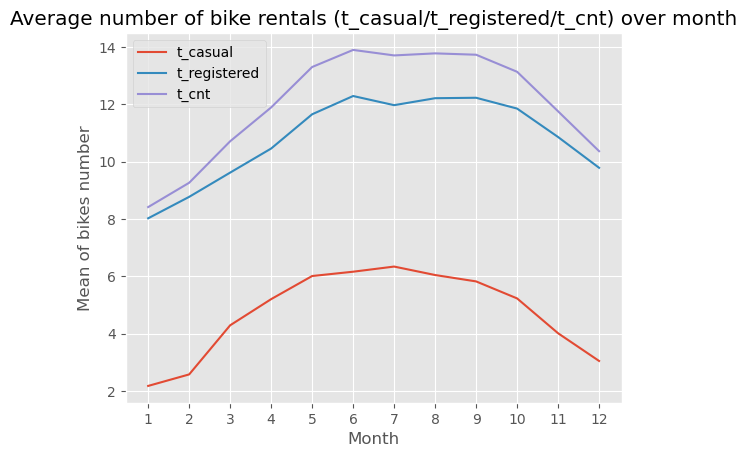

In [27]:
# Average number of transformed rentals (t_casual/t_registered/t_cnt) over month:
mnth_casual = df.groupby('mnth')['t_casual'].mean()  # average of t_casual over month
mnth_registered = df.groupby('mnth')['t_registered'].mean()  # average of t_registered over month
mnth_cnt = df.groupby('mnth')['t_cnt'].mean()  # average of t_cnt over month

plt.figure()
plt.plot(mnth_casual, label='t_casual')
plt.plot(mnth_registered, label='t_registered')
plt.plot(mnth_cnt, label='t_cnt')
plt.xlabel("Month")
plt.ylabel("Mean of bikes number")
plt.title("Average number of bike rentals (t_casual/t_registered/t_cnt) over month")
plt.xticks(range(1, 13), range(1, 13))  # Set the x-axis ticks and labels to show months from 1 to 12
plt.legend()
plt.show()

Finding:
- The analysis indicates that, on average, the number of rental bikes during the first and last months of the year is lower compared to the other months for both casual and registered users.
- Overall, the average number of rental bikes for registered users is higher than the value for casual users.

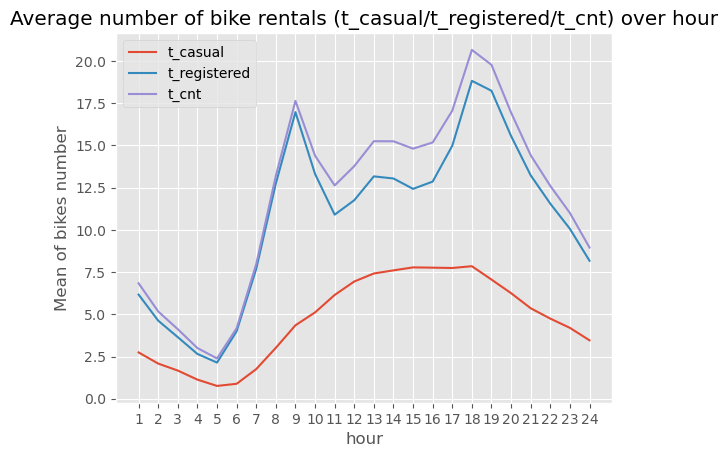

In [28]:
# Average number of transformed rentals (t_casual/t_registered/t_cnt) over hour:
hr_casual=df.groupby('hr')['t_casual'].mean() # average of t_casual over hour
hr_registered=df.groupby('hr')['t_registered'].mean() # average of t_registered over hour
hr_cnt=df.groupby('hr')['t_cnt'].mean() # average of t_cnt over hour

plt.figure()
plt.plot(hr_casual,label='t_casual')
plt.plot(hr_registered,label='t_registered')
plt.plot(hr_cnt, label='t_cnt')
plt.xlabel("hour")
plt.ylabel("Mean of bikes number")
plt.title("Average number of bike rentals (t_casual/t_registered/t_cnt) over hour")
plt.xticks(range(0, 24), range(1, 25))  # Set the x-axis ticks and labels to show hours from 1 to 24
plt.legend()
plt.show()

Finding: 
- The distribution of rental bike numbers varies, on average, throughout the hours of a day for both casual and registered users.
- For casual users, the average rental bike numbers increase during the hours between 5 and 18.
- For registered users, the average rental bike numbers exhibit two distinct peaks at hours 9 and 18.
- In general, the average number of rental bikes for registered users surpasses that of casual users.

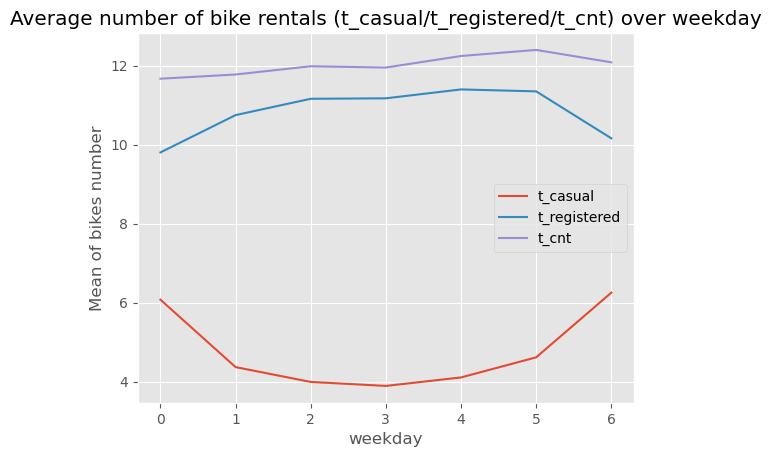

In [29]:
# Average number of transformed rentals (t_casual/t_registered/t_cnt) over weekday:
weekday_casual=df.groupby('weekday')['t_casual'].mean() # average of t_casual over weekday
weekday_registered=df.groupby('weekday')['t_registered'].mean() # average of t_registered over weekday
weekday_cnt=df.groupby('weekday')['t_cnt'].mean() # average of t_cnt over weekday

plt.figure()
plt.plot(weekday_casual,label='t_casual')
plt.plot(weekday_registered,label='t_registered')
plt.plot(weekday_cnt, label='t_cnt')
plt.xlabel("weekday")
plt.ylabel("Mean of bikes number")
plt.title("Average number of bike rentals (t_casual/t_registered/t_cnt) over weekday")
plt.legend()
plt.show()

Finding:
- It is evident that at the beginning and end of the week, the average number of casual rentals is higher compared to the middle of the week.
- However, the opposite behavior is observed for registered users. The average number of rentals is higher in the middle of the week compared to the beginning and end of the week.
- In general, the average number of rental bikes for the 'cnt' variable surpasses that of registered users and is followed by that of casual users.

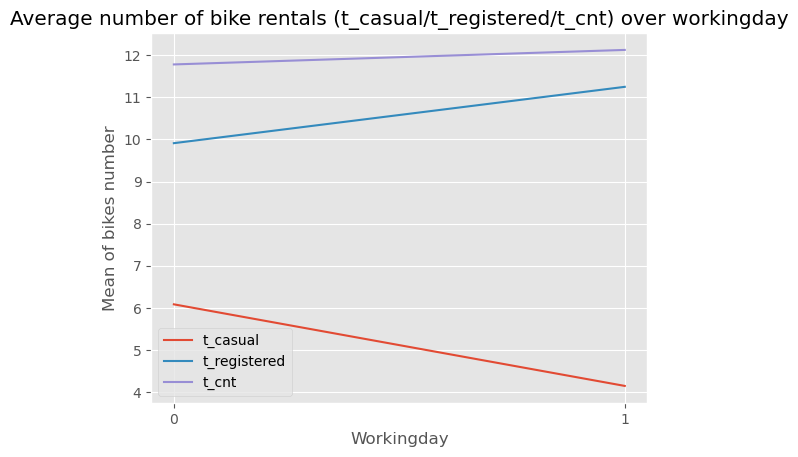

In [30]:
# Average number of transformed rentals (t_casual/t_registered/t_cnt) over workingday:
workingday_casual = df.groupby('workingday')['t_casual'].mean()  # average of t_casual over workingday
workingday_registered = df.groupby('workingday')['t_registered'].mean()  # average of t_registered over workingday
workingday_cnt = df.groupby('workingday')['t_cnt'].mean()  # average of t_cnt over workingday

plt.figure()
plt.plot([0, 1], workingday_casual, label='t_casual')
plt.plot([0, 1], workingday_registered, label='t_registered')
plt.plot([0, 1], workingday_cnt, label='t_cnt')
plt.xlabel("Workingday")
plt.ylabel("Mean of bikes number")
plt.title("Average number of bike rentals (t_casual/t_registered/t_cnt) over workingday")
plt.xticks([0, 1], ['0', '1'])  # Set the x-axis ticks and labels
plt.legend()
plt.show()

Finding:
- For casual users, the average number of rentals is lower on working days than on non-working days.
- However, the opposite behavior is observed for registered users. The average number of rentals is higher on working days compared to non-working days.
- A similar trend as registered users is seen for the t_cnt variable, but with a smaller slope of increase on working days.

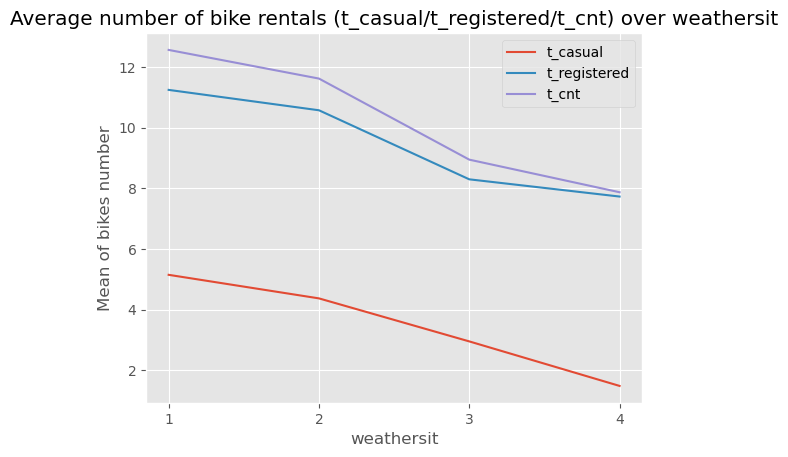

In [31]:
# Average number of transformed rentals (casual/registered/cnt) over weather situation:
weathersit_casual=df.groupby('weathersit')['t_casual'].mean() # average of t_casual over weathersit
weathersit_registered=df.groupby('weathersit')['t_registered'].mean() # average of t_registered over weathersit
weathersit_cnt=df.groupby('weathersit')['t_cnt'].mean() # average of t_cnt over weathersit

plt.figure()
plt.plot(weathersit_casual,label='t_casual')
plt.plot(weathersit_registered,label='t_registered')
plt.plot(weathersit_cnt, label='t_cnt')
plt.xlabel("weathersit")
plt.ylabel("Mean of bikes number")
plt.title("Average number of bike rentals (t_casual/t_registered/t_cnt) over weathersit")
plt.xticks(range(1, 5), range(1, 5))  # Set the x-axis ticks and labels to show weather situation from 1 to 4
plt.legend()
plt.show()

Finding:
- The mean number of rentals for t_casual and t_registered users, as well as the t_cnt variable, shows a decreasing trend as the values of weather situations increase.

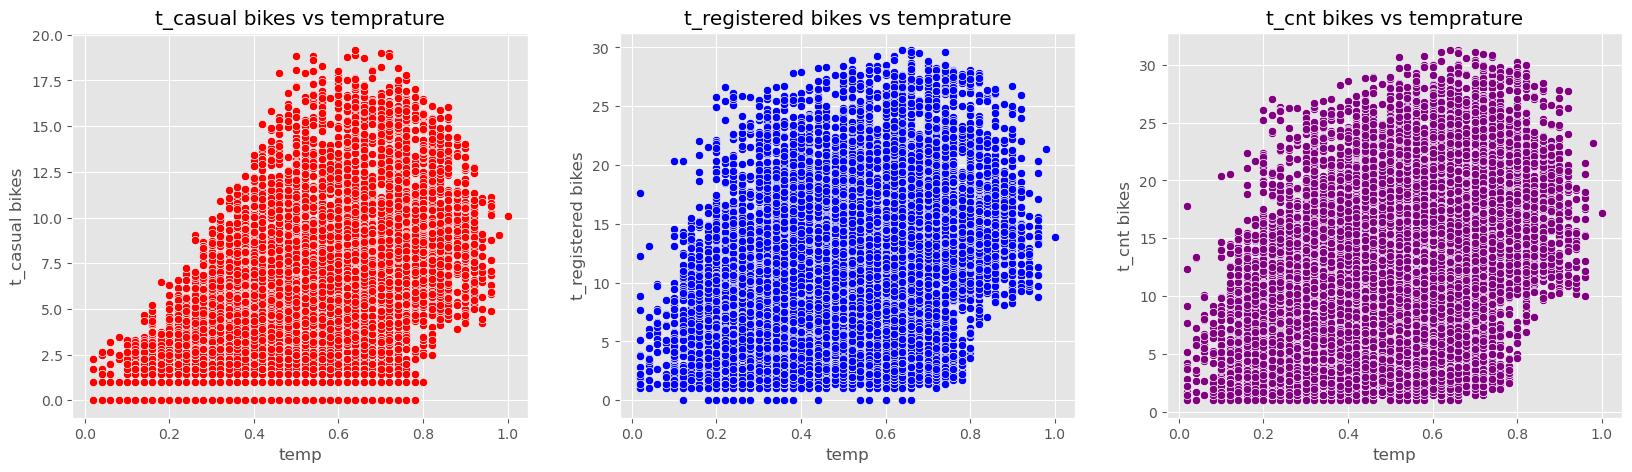

In [32]:
# relationship between transformed rental bikes users and temp
t_uers=['t_casual','t_registered','t_cnt']
colors=['red','blue','purple']
plt.subplots(1, 3, figsize=(20, 5))
i=1
for column in t_uers:
    plt.subplot(1, 3, i)
    sns.scatterplot(x='temp', y=column, data=df, color=colors[i-1])
    plt.xlabel('temp')
    plt.ylabel(f'{column} bikes')
    plt.title(f'{column} bikes vs temprature')
    i += 1
plt.show()  

Finding:
- The average number of bikes for t_casual and t_registered users, as well as the t_cnt field, does not exhibit notable linear correlation with temperature.

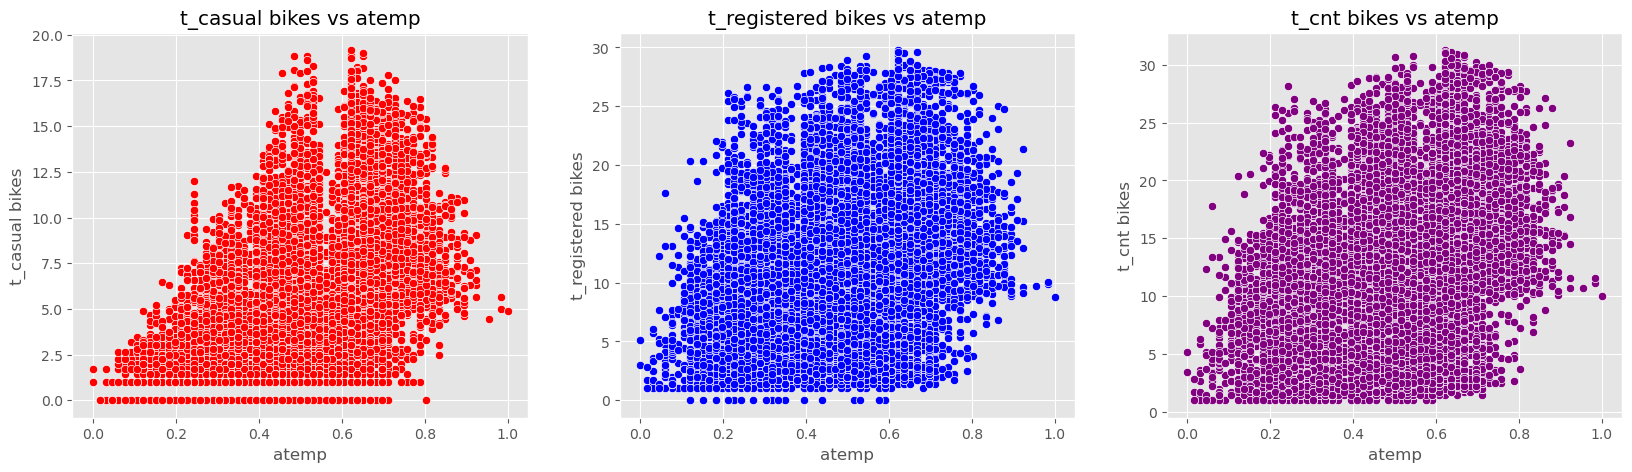

In [33]:
# relationship between transformed rental bikes users and atemp
t_uers=['t_casual','t_registered','t_cnt']
colors=['red','blue','purple']
plt.subplots(1, 3, figsize=(20, 5))
i=1
for column in t_uers:
    plt.subplot(1, 3, i)
    sns.scatterplot(x='atemp', y=column, data=df, color=colors[i-1])
    plt.xlabel('atemp')
    plt.ylabel(f'{column} bikes')
    plt.title(f'{column} bikes vs atemp')
    i += 1
plt.show()  

Finding:
- There is no strong linear correlation between feeling temperature and the average number of bikes for t_casual and t_registered users as well as t_cnt filed.

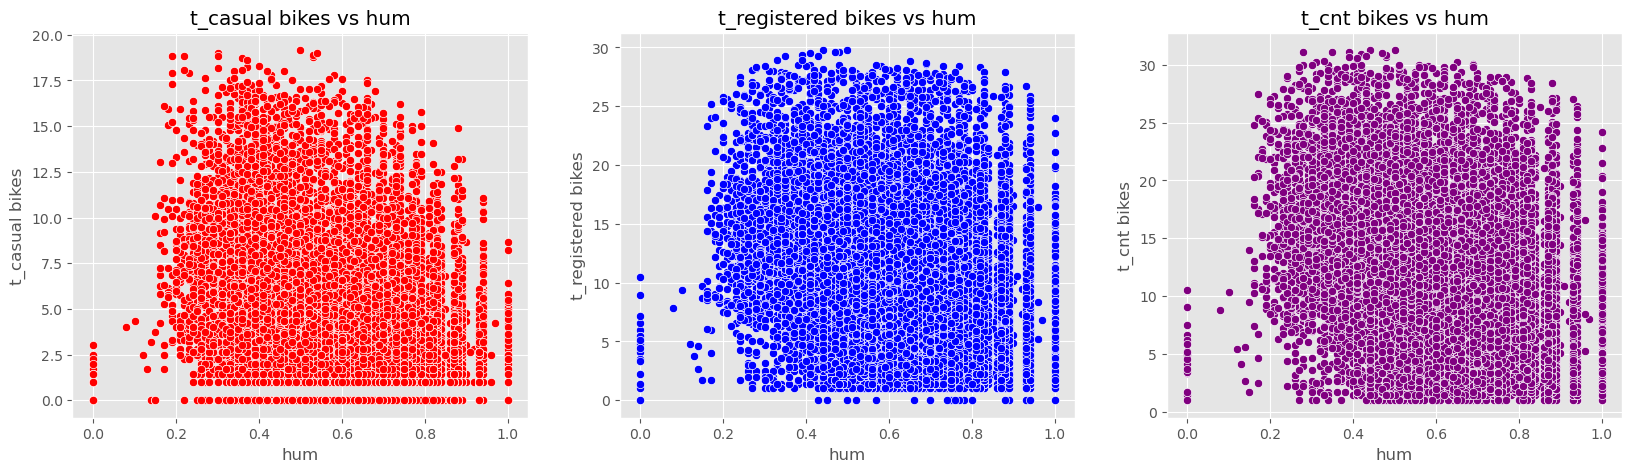

In [34]:
# relationship between transformed rental bikes users and hum
t_uers=['t_casual','t_registered','t_cnt']
colors=['red','blue','purple']
plt.subplots(1, 3, figsize=(20, 5))
i=1
for column in t_uers:
    plt.subplot(1, 3, i)
    sns.scatterplot(x='hum', y=column, data=df, color=colors[i-1])
    plt.xlabel('hum')
    plt.ylabel(f'{column} bikes')
    plt.title(f'{column} bikes vs hum')
    i += 1
plt.show()  

Finding:
- The visulas does not show a notable linear correlation between humidity and the average number of Bikes for t_casual and t_registered users as well as t_cnt filed.

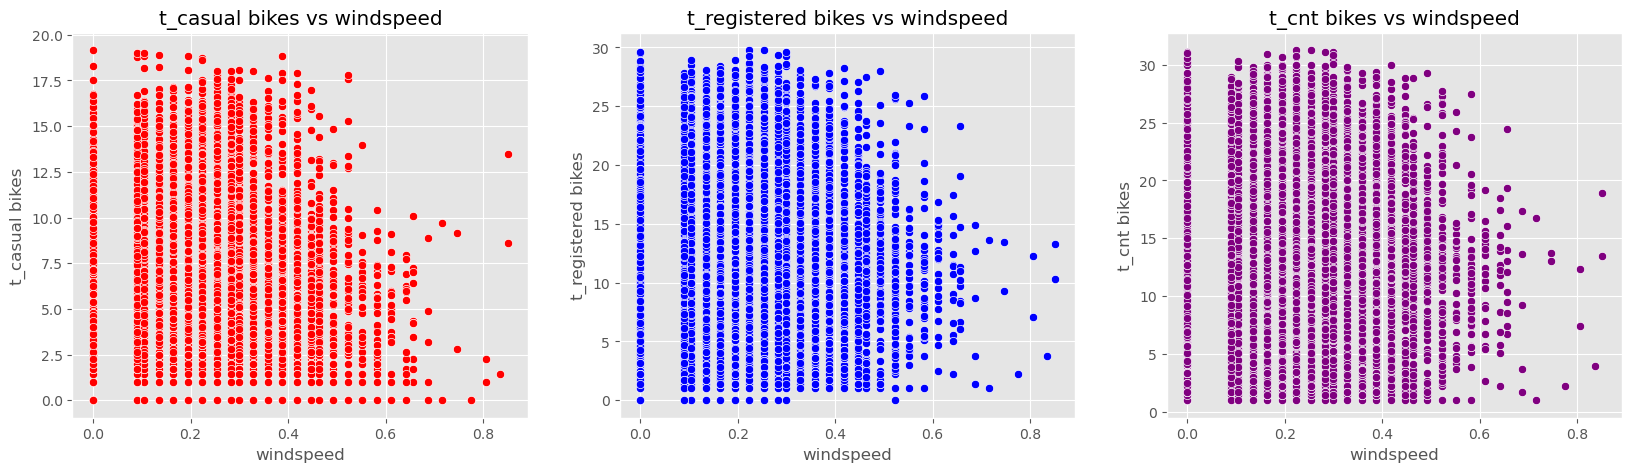

In [35]:
# relationship between transformed rental bikes users and windspeed
t_uers=['t_casual','t_registered','t_cnt']
colors=['red','blue','purple']
plt.subplots(1, 3, figsize=(20, 5))
i=1
for column in t_uers:
    plt.subplot(1, 3, i)
    sns.scatterplot(x='windspeed', y=column, data=df, color=colors[i-1])
    plt.xlabel('windspeed')
    plt.ylabel(f'{column} bikes')
    plt.title(f'{column} bikes vs windspeed')
    i += 1
plt.show()

Finding:
- The scatter plot does not display a linear correlation between windspeed and the average number of bikes for t_casual and t_registered users as well as t_cnt filed.

### Part 3: Statistical Analysis

In [37]:
# Here, we determine Which columns are positively or negatively correlated with the number of rental bikes 
# and see if they are statistically significant:
t_uers=['t_casual','t_registered','t_cnt']
for i in t_uers:
    print(f'\n correlation between number of {i} rentals and \n')
    for column in df_num.columns:
        if column in ['casual','registered','cnt']:
            continue
        else:
            t_statistic,p = stats.pearsonr(df[column],df[i])
            print(f"\t {column}: T_statistic={t_statistic:4.3f}, p_value={p:4.3f}")


 correlation between number of t_casual rentals and 

	 season: T_statistic=0.164, p_value=0.000
	 yr: T_statistic=0.134, p_value=0.000
	 mnth: T_statistic=0.102, p_value=0.000
	 hr: T_statistic=0.419, p_value=0.000
	 holiday: T_statistic=0.026, p_value=0.001
	 weekday: T_statistic=0.023, p_value=0.003
	 workingday: T_statistic=-0.250, p_value=0.000
	 weathersit: T_statistic=-0.174, p_value=0.000
	 temp: T_statistic=0.550, p_value=0.000
	 atemp: T_statistic=0.545, p_value=0.000
	 hum: T_statistic=-0.388, p_value=0.000
	 windspeed: T_statistic=0.103, p_value=0.000

 correlation between number of t_registered rentals and 

	 season: T_statistic=0.179, p_value=0.000
	 yr: T_statistic=0.231, p_value=0.000
	 mnth: T_statistic=0.124, p_value=0.000
	 hr: T_statistic=0.490, p_value=0.000
	 holiday: T_statistic=-0.046, p_value=0.000
	 weekday: T_statistic=0.030, p_value=0.000
	 workingday: T_statistic=0.103, p_value=0.000
	 weathersit: T_statistic=-0.124, p_value=0.000
	 temp: T_statistic=0.36

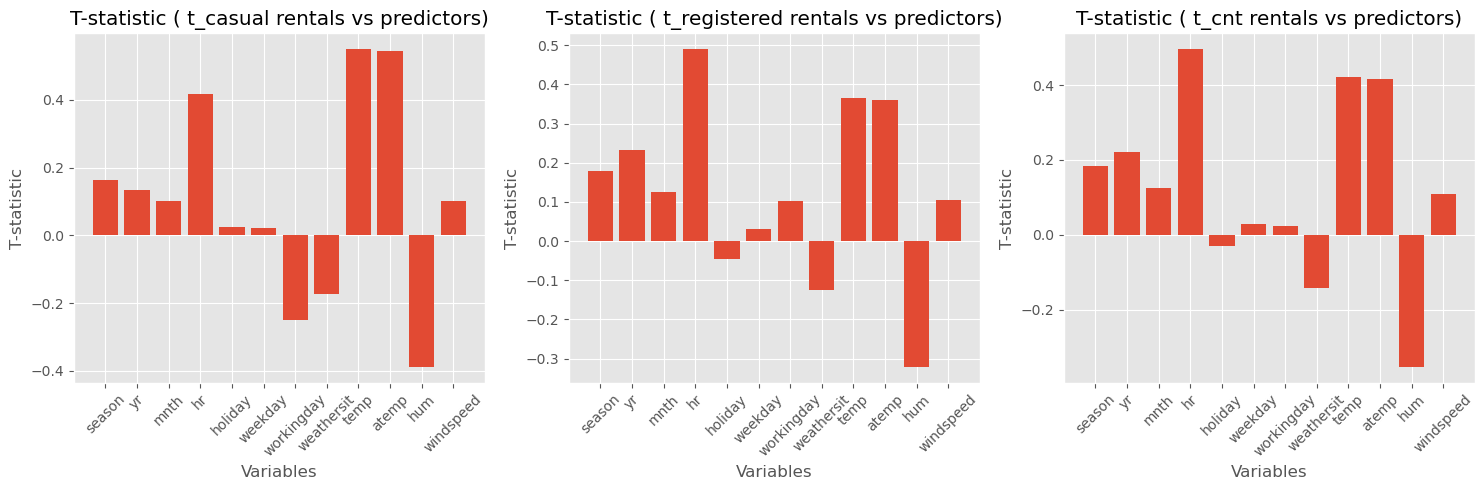

In [47]:
t_users = ['t_casual', 't_registered', 't_cnt']

# Create a dictionary to store the T-statistic values
t_statistics = {}

# Calculate T-statistic for each variable
for i in t_users:
    t_statistics[i] = {}
    for column in df_num.columns:
        if column in ['casual', 'registered', 'cnt']:
            continue
        else:
            t_statistic, p = stats.pearsonr(df[column], df[i])
            t_statistics[i][column] = t_statistic

# Create a subplot with three bar plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting bar plots for each target variable
for idx, i in enumerate(t_users):
    axs[idx].bar(t_statistics[i].keys(), t_statistics[i].values())
    axs[idx].set_xlabel('Variables')
    axs[idx].set_ylabel('T-statistic')
    axs[idx].set_title(f'T-statistic ( {i} rentals vs predictors)')
    axs[idx].tick_params(axis='x', rotation=45) 
# Adjust layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

Finding:
- For casual users:
   - season, yr, mnth, hr, holiday, weekday, temp, atemp, and windspeed are positively correlated with number of t_casual rentals.
   - workingday,  weathersit, and hum are negatively correlated with number of t_casual rentals.

- For registered users:
   - season, yr, mnth, hr, ,weekday, workingday, temp, atemp, and windspeed are positively correlated with number of t_registered rentals.
   - holiday, weathersit, and hum are negatively correlated with number of t_registered rentals.
   
   
- For 'cnt' column:
   - season, yr, mnth, hr, ,weekday, workingday, temp, atemp, and windspeed are positively correlated with number of t_cnt rentals.
   - holiday, weathersit, and hum are negatively correlated with number of t_cnt rentals.

- Since all the p-values are less that 0.05, we conclude that all these relations are statistically significant.
- temp, atemp, hr, and hum are the predictors with higher correlation with the three target variables.

### Recap:  
#### Data preparation and cleaning 
1. Importing requried libraries;
2. Reading data;
3. Expolring data by looking at its structure and contents;
4. Ckecking data for duplicated rows and columns
5. Ckecking data for Missing values.
   
#### Visualization and analysis
- Visualize the distribution of all numrical variables.
- Provide the distributions of bikes rentals across date, season, year, month, hour, weekday, workingday, weather situation, temp, atemp, humidity, and windspeed.
- Provide insights into the positively and negatively correlated columns with the rental bikes

#### Insights 
- The columns 'month' and 'season' exhibit a strong positive correlation.
- 'temp' and 'atemp' are highly correlated.
- The columns 'registered', 'cnt', and 'casual' show a high positive correlation with each other.
- The variables 'casual', 'registered', and 'cnt' demonstrate a notably strong right-skewed distribution.
- It is evident that the average number of bikes rented by casual users is lower than that of registered users over the two years.
- The analysis indicates a noticeable increase in the number of registered bike rentals from the year 2011 to 2012. However, the increase in casual rentals over the same period is relatively small.
- For both casual and registered users, the average number of bike rentals is higher during the spring and summer seasons compared to the winter and fall seasons.
- The analysis indicates that, on average, the number of rental bikes during the first and last months of the year is lower compared to the other months for both casual and registered users.
- In general, the average number of rental bikes for registered users surpasses that of casual users.
- It is evident that at the beginning and end of the week, the average number of rentals is higher compared to the middle of the week. However, the opposite behavior is observed for registered users. 
- For casual users, the average number of rentals is lower on working days than on non-working days. However, the opposite behavior is observed for registered users. 
- The mean number of rentals for both casual and registered users, as well as the 'cnt' variable, shows a decreasing trend as the values of weather situations increase.
- All the columns are significantly correlated with the three types of rental bikes (casual/registered/cnt).